### Ev Market Data (Market Segmentation Analysis)

### Rahul Kumar

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


In [156]:
# Load the dataset
df = pd.read_csv("IEA-EV-data.csv")
df

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,sales,49.00000
1,Australia,Historical,EV stock,Cars,BEV,2011,stock,49.00000
2,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
3,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
4,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000
...,...,...,...,...,...,...,...,...
7429,World,Projection-STEPS,Oil displacement Mbd,Cars,EV,2030,Milion barrels per day,2.40000
7430,World,Projection-STEPS,Oil displacement Mlge,Buses,EV,2030,Milion litres gasoline equivalent,30000.00000
7431,World,Projection-STEPS,Oil displacement Mlge,Trucks,EV,2030,Milion litres gasoline equivalent,14000.00000
7432,World,Projection-STEPS,Oil displacement Mlge,Vans,EV,2030,Milion litres gasoline equivalent,16000.00000


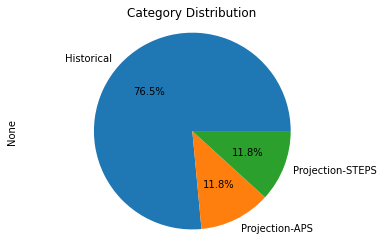

In [157]:
counts = df.groupby('category').size()

# Create a pie chart from the counts
counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Category Distribution')
plt.show()

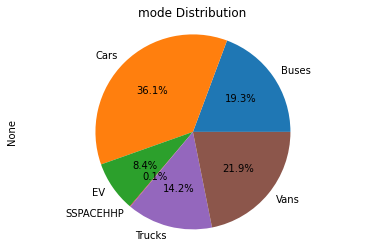

In [158]:
counts = df.groupby('mode').size()

# Create a pie chart from the counts
counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('mode Distribution')
plt.show()

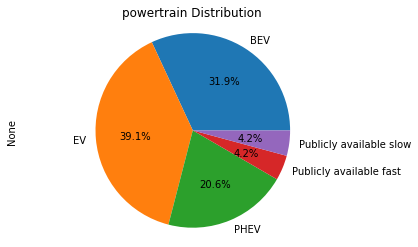

In [159]:
counts = df.groupby('powertrain').size()

# Create a pie chart from the counts
counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('powertrain Distribution')
plt.show()

In [160]:
pd.set_option('display.max_rows',1000)
df1 = df.loc[3021:3333]

In [161]:
df1

,region,category,parameter,mode,powertrain,year,unit,value
3021,India,Historical,EV sales share,Cars,EV,2010,percent,2.100000e-02
3022,India,Historical,EV stock share,Cars,EV,2010,percent,5.200000e-03
3023,India,Historical,Oil displacement Mbd,Cars,EV,2010,Milion barrels per day,1.500000e-05
3024,India,Historical,Oil displacement Mlge,Cars,EV,2010,Milion litres gasoline equivalent,8.600000e-01
3025,India,Historical,Oil displacement Mbd,Cars,EV,2011,Milion barrels per day,3.000000e-05
3026,India,Historical,Oil displacement Mlge,Cars,EV,2011,Milion litres gasoline equivalent,1.700000e+00
3027,India,Historical,EV stock share,Cars,EV,2011,percent,6.900000e-03
3028,India,Historical,EV sales share,Cars,EV,2011,percent,5.600000e-02
3029,India,Historical,EV stock,Cars,BEV,2011,stock,1.300000e+03
3030,India,Historical,EV sales,Cars,BEV,2011,sales,1.400000e+03


In [162]:
df1.head()

,region,category,parameter,mode,powertrain,year,unit,value
3021,India,Historical,EV sales share,Cars,EV,2010,percent,0.021000
3022,India,Historical,EV stock share,Cars,EV,2010,percent,0.005200
3023,India,Historical,Oil displacement Mbd,Cars,EV,2010,Milion barrels per day,0.000015
3024,India,Historical,Oil displacement Mlge,Cars,EV,2010,Milion litres gasoline equivalent,0.860000
3025,India,Historical,Oil displacement Mbd,Cars,EV,2011,Milion barrels per day,0.000030


<AxesSubplot:xlabel='mode', ylabel='count'>

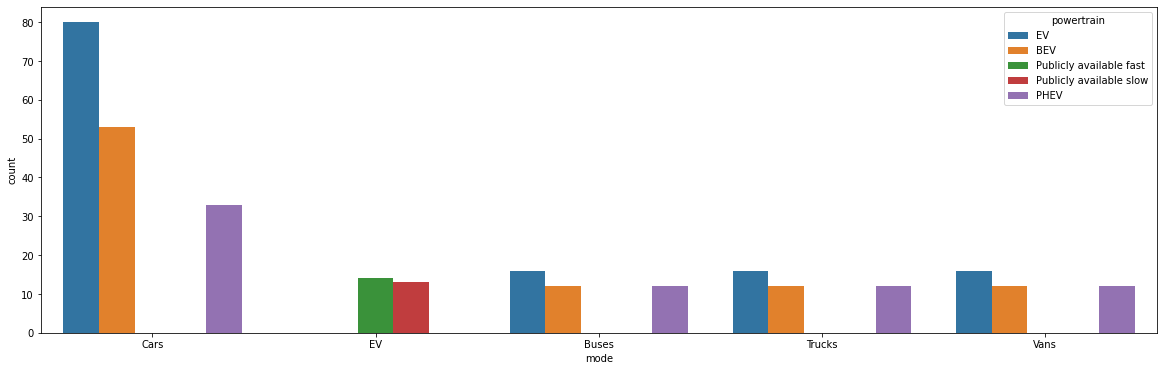

In [116]:
plt.figure(figsize=(20,6))
sns.countplot(x="mode", data=df1, hue="powertrain")

<AxesSubplot:xlabel='parameter', ylabel='count'>

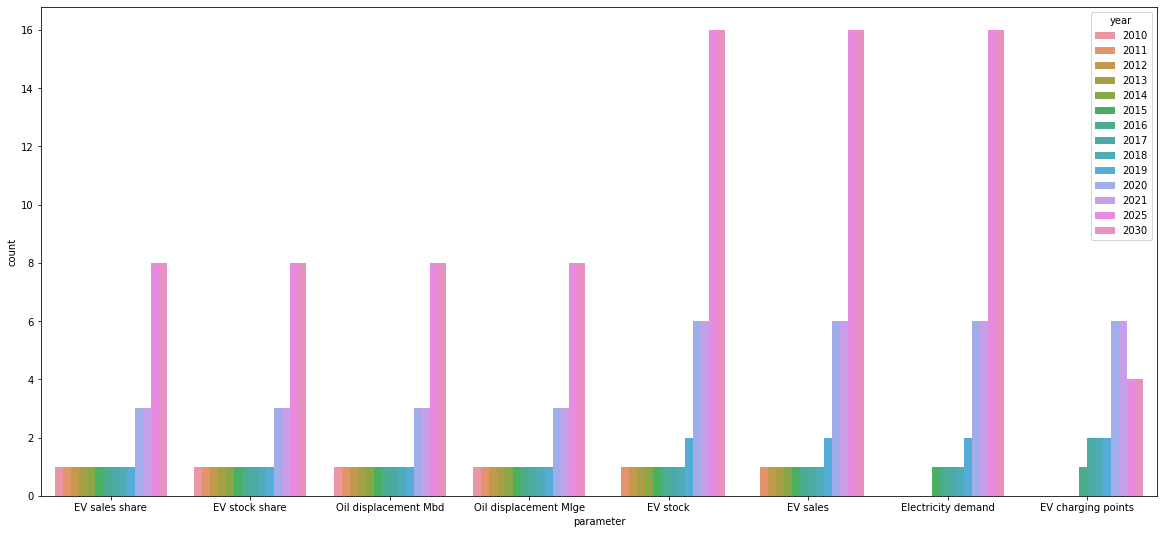

In [117]:
plt.figure(figsize=(20,9))
sns.countplot(x="parameter", data=df1, hue="year")

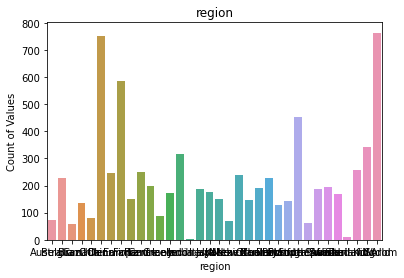

 Top 10 Values 
 World                763
China                751
Europe               584
Rest of the world    451
USA                  343
India                315
United Kingdom       256
France               249
Denmark              247
Netherlands          240
Name: region, dtype: int64
****************************************************************************************************


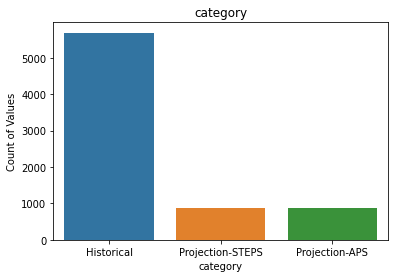

 Top 10 Values 
 Historical          5686
Projection-STEPS     874
Projection-APS       874
Name: category, dtype: int64
****************************************************************************************************


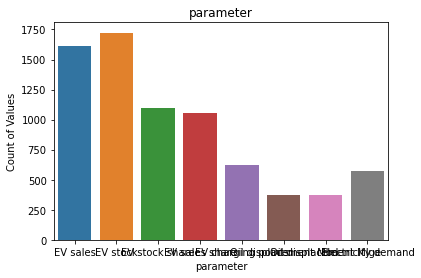

 Top 10 Values 
 EV stock                 1723
EV sales                 1609
EV stock share           1096
EV sales share           1059
EV charging points        623
Electricity demand        576
Oil displacement Mbd      374
Oil displacement Mlge     374
Name: parameter, dtype: int64
****************************************************************************************************


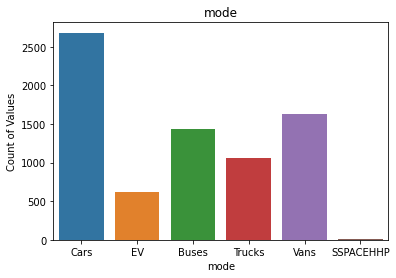

 Top 10 Values 
 Cars         2684
Vans         1625
Buses        1436
Trucks       1058
EV            623
SSPACEHHP       8
Name: mode, dtype: int64
****************************************************************************************************


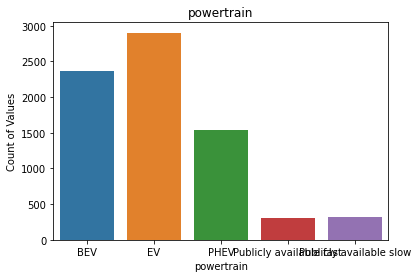

 Top 10 Values 
 EV                         2903
BEV                        2373
PHEV                       1535
Publicly available slow     313
Publicly available fast     310
Name: powertrain, dtype: int64
****************************************************************************************************


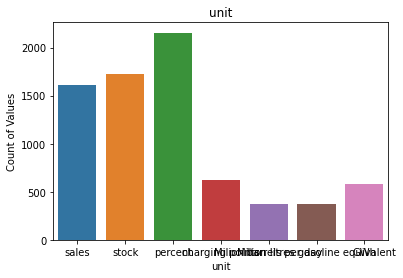

 Top 10 Values 
 percent                              2155
stock                                1723
sales                                1609
charging points                       623
GWh                                   576
Milion barrels per day                374
Milion litres gasoline equivalent     374
Name: unit, dtype: int64
****************************************************************************************************


In [119]:
#Categorical Values
for i in df1.select_dtypes("object"):
    plt.title(i)
    sns.countplot(x=df[i], data=df)
    plt.xlabel(i)
    plt.ylabel("Count of Values")
    plt.show()

    print(" Top 10 Values \n",df[i].value_counts().sort_values(ascending = False)[:10])
    print("*"*100)

In [120]:
df1.shape

(313, 8)

In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 3021 to 3333
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      313 non-null    object 
 1   category    313 non-null    object 
 2   parameter   313 non-null    object 
 3   mode        313 non-null    object 
 4   powertrain  313 non-null    object 
 5   year        313 non-null    int64  
 6   unit        313 non-null    object 
 7   value       313 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 19.7+ KB


In [122]:
df1.describe()

,year,value
count,313.000000,3.130000e+02
mean,2023.041534,1.022754e+05
std,5.619466,8.402277e+05
min,2010.000000,1.500000e-05
25%,2020.000000,4.200000e-01
50%,2025.000000,3.300000e+01
75%,2030.000000,2.800000e+03
max,2030.000000,1.300000e+07


In [123]:
df1.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [124]:
# Drop any unnecessary columns
df1.drop(columns=['mode', 'year', 'unit'], inplace=True)

# Check for missing values
df1.isnull().sum()

# Perform data cleaning
df1 = df1.dropna()

In [125]:
df1

,region,category,parameter,powertrain,value
3021,India,Historical,EV sales share,EV,2.100000e-02
3022,India,Historical,EV stock share,EV,5.200000e-03
3023,India,Historical,Oil displacement Mbd,EV,1.500000e-05
3024,India,Historical,Oil displacement Mlge,EV,8.600000e-01
3025,India,Historical,Oil displacement Mbd,EV,3.000000e-05
3026,India,Historical,Oil displacement Mlge,EV,1.700000e+00
3027,India,Historical,EV stock share,EV,6.900000e-03
3028,India,Historical,EV sales share,EV,5.600000e-02
3029,India,Historical,EV stock,BEV,1.300000e+03
3030,India,Historical,EV sales,BEV,1.400000e+03


In [126]:
# Transform categorical variables into dummy variables
df1 = pd.get_dummies(df1, columns=['region', 'category', 'parameter', 'powertrain'], drop_first=True)
df1

,value,category_Projection-APS,category_Projection-STEPS,parameter_EV sales,parameter_EV sales share,parameter_EV stock,parameter_EV stock share,parameter_Electricity demand,parameter_Oil displacement Mbd,parameter_Oil displacement Mlge,powertrain_EV,powertrain_PHEV,powertrain_Publicly available fast,powertrain_Publicly available slow
3021,2.100000e-02,0,0,0,1,0,0,0,0,0,1,0,0,0
3022,5.200000e-03,0,0,0,0,0,1,0,0,0,1,0,0,0
3023,1.500000e-05,0,0,0,0,0,0,0,1,0,1,0,0,0
3024,8.600000e-01,0,0,0,0,0,0,0,0,1,1,0,0,0
3025,3.000000e-05,0,0,0,0,0,0,0,1,0,1,0,0,0
3026,1.700000e+00,0,0,0,0,0,0,0,0,1,1,0,0,0
3027,6.900000e-03,0,0,0,0,0,1,0,0,0,1,0,0,0
3028,5.600000e-02,0,0,0,1,0,0,0,0,0,1,0,0,0
3029,1.300000e+03,0,0,0,0,1,0,0,0,0,0,0,0,0
3030,1.400000e+03,0,0,1,0,0,0,0,0,0,0,0,0,0


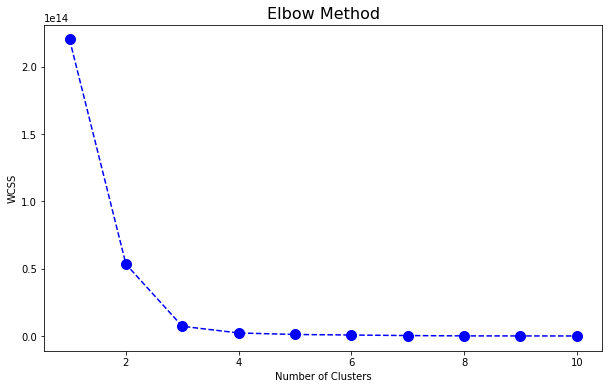

In [127]:
from sklearn.cluster import KMeans

# Determine optimal number of clusters using Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,color='blue', linestyle='dashed', marker='o',
          markersize=10)

plt.title('Elbow Method', size=16)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [128]:
# Perform clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df1)

In [129]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,

In [130]:
# Create a new dataframe with the segment labels
df1_seg = pd.concat([df1.reset_index(drop=True), pd.DataFrame({'Segment': y_kmeans})], axis=1)

# Calculate the mean values for each cluster
df1_seg_mean = df1_seg.groupby(['Segment'], as_index=False).mean()

In [131]:
df1_seg

,value,category_Projection-APS,category_Projection-STEPS,parameter_EV sales,parameter_EV sales share,parameter_EV stock,parameter_EV stock share,parameter_Electricity demand,parameter_Oil displacement Mbd,parameter_Oil displacement Mlge,powertrain_EV,powertrain_PHEV,powertrain_Publicly available fast,powertrain_Publicly available slow,Segment
0,2.100000e-02,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,5.200000e-03,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1.500000e-05,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,8.600000e-01,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,3.000000e-05,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5,1.700000e+00,0,0,0,0,0,0,0,0,1,1,0,0,0,0
6,6.900000e-03,0,0,0,0,0,1,0,0,0,1,0,0,0,0
7,5.600000e-02,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8,1.300000e+03,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,1.400000e+03,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [132]:
df1_seg.isnull().sum()

value                                 0
category_Projection-APS               0
category_Projection-STEPS             0
parameter_EV sales                    0
parameter_EV sales share              0
parameter_EV stock                    0
parameter_EV stock share              0
parameter_Electricity demand          0
parameter_Oil displacement Mbd        0
parameter_Oil displacement Mlge       0
powertrain_EV                         0
powertrain_PHEV                       0
powertrain_Publicly available fast    0
powertrain_Publicly available slow    0
Segment                               0
dtype: int64

In [133]:
df1_seg_mean

,Segment,value,category_Projection-APS,category_Projection-STEPS,parameter_EV sales,parameter_EV sales share,parameter_EV stock,parameter_EV stock share,parameter_Electricity demand,parameter_Oil displacement Mbd,parameter_Oil displacement Mlge,powertrain_EV,powertrain_PHEV,powertrain_Publicly available fast,powertrain_Publicly available slow
0,0,1.234276e+04,0.335526,0.345395,0.167763,0.105263,0.164474,0.105263,0.164474,0.105263,0.105263,0.421053,0.226974,0.046053,0.036184
1,1,1.300000e+07,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,4.850000e+06,0.500000,0.500000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,9.266667e+05,0.666667,0.333333,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333


In [134]:
# Scale the data
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)


In [135]:
# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df1_scaled)

# Add the cluster labels to the original dataframe
df1['Cluster'] = kmeans.labels_

# Perform PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

# Add the PCA components to the dataframe
df1['PCA1'] = df1_pca[:,0]
df1['PCA2'] = df1_pca[:,1]


In [136]:
# Describing the segments
segment_info = df1.groupby('Cluster').agg({
    'value': ['mean', 'min', 'max', 'count'],
    'category_Projection-APS': 'mean',
    'category_Projection-STEPS' : 'mean',
    'parameter_EV sales' : 'mean',
    'parameter_EV sales share' : 'mean',
    'parameter_EV stock': 'mean',
    'parameter_EV stock share' : 'mean',
    'parameter_Electricity demand' : 'mean',
    'parameter_Oil displacement Mbd' : 'mean',
    'parameter_Oil displacement Mlge' : 'mean',
    'powertrain_EV' : 'mean',
    'powertrain_PHEV' : 'mean',
    'powertrain_Publicly available fast' : 'mean',
    'powertrain_Publicly available slow' : 'mean',
    'PCA1': 'mean',
    'PCA2': 'mean'
})
print(segment_info)

                 value                             category_Projection-APS  \
                  mean       min         max count                    mean   
Cluster                                                                      
0           167.979871  0.000015     11000.0   128                0.312500   
1        409448.012963  1.700000  13000000.0    54                0.370370   
2         75423.695444  0.004100   4400000.0   131                0.366412   

        category_Projection-STEPS parameter_EV sales parameter_EV sales share  \
                             mean               mean                     mean   
Cluster                                                                         
0                        0.312500           0.000000                     0.25   
1                        0.370370           0.000000                     0.00   
2                        0.366412           0.412214                     0.00   

        parameter_EV stock parameter_EV stoc

In [137]:
pd.set_option('display.max_rows',1000)
df2 = df.loc[3021:3333]

In [138]:
df2

,region,category,parameter,mode,powertrain,year,unit,value
3021,India,Historical,EV sales share,Cars,EV,2010,percent,2.100000e-02
3022,India,Historical,EV stock share,Cars,EV,2010,percent,5.200000e-03
3023,India,Historical,Oil displacement Mbd,Cars,EV,2010,Milion barrels per day,1.500000e-05
3024,India,Historical,Oil displacement Mlge,Cars,EV,2010,Milion litres gasoline equivalent,8.600000e-01
3025,India,Historical,Oil displacement Mbd,Cars,EV,2011,Milion barrels per day,3.000000e-05
3026,India,Historical,Oil displacement Mlge,Cars,EV,2011,Milion litres gasoline equivalent,1.700000e+00
3027,India,Historical,EV stock share,Cars,EV,2011,percent,6.900000e-03
3028,India,Historical,EV sales share,Cars,EV,2011,percent,5.600000e-02
3029,India,Historical,EV stock,Cars,BEV,2011,stock,1.300000e+03
3030,India,Historical,EV sales,Cars,BEV,2011,sales,1.400000e+03


In [139]:
df2.shape

(313, 8)

In [140]:
# Drop any unnecessary columns
df2.drop(columns=['region', 'unit'], inplace=True)

# Check for missing values
df2.isnull().sum()

# Perform data cleaning
df2 = df2.dropna()



In [141]:
df2

,category,parameter,mode,powertrain,year,value
3021,Historical,EV sales share,Cars,EV,2010,2.100000e-02
3022,Historical,EV stock share,Cars,EV,2010,5.200000e-03
3023,Historical,Oil displacement Mbd,Cars,EV,2010,1.500000e-05
3024,Historical,Oil displacement Mlge,Cars,EV,2010,8.600000e-01
3025,Historical,Oil displacement Mbd,Cars,EV,2011,3.000000e-05
3026,Historical,Oil displacement Mlge,Cars,EV,2011,1.700000e+00
3027,Historical,EV stock share,Cars,EV,2011,6.900000e-03
3028,Historical,EV sales share,Cars,EV,2011,5.600000e-02
3029,Historical,EV stock,Cars,BEV,2011,1.300000e+03
3030,Historical,EV sales,Cars,BEV,2011,1.400000e+03


In [142]:
df2.dtypes

category       object
parameter      object
mode           object
powertrain     object
year            int64
value         float64
dtype: object

In [143]:
# Encode categorical variables using LabelEncoder
le = LabelEncoder()
df2["category"] = le.fit_transform(df2["category"])
df2["mode"] = le.fit_transform(df2["mode"])
df2["parameter"] = le.fit_transform(df2["parameter"])
df2["powertrain"] = le.fit_transform(df2["powertrain"])

In [144]:
df2

,category,parameter,mode,powertrain,year,value
3021,0,2,1,1,2010,2.100000e-02
3022,0,4,1,1,2010,5.200000e-03
3023,0,6,1,1,2010,1.500000e-05
3024,0,7,1,1,2010,8.600000e-01
3025,0,6,1,1,2011,3.000000e-05
3026,0,7,1,1,2011,1.700000e+00
3027,0,4,1,1,2011,6.900000e-03
3028,0,2,1,1,2011,5.600000e-02
3029,0,3,1,0,2011,1.300000e+03
3030,0,1,1,0,2011,1.400000e+03


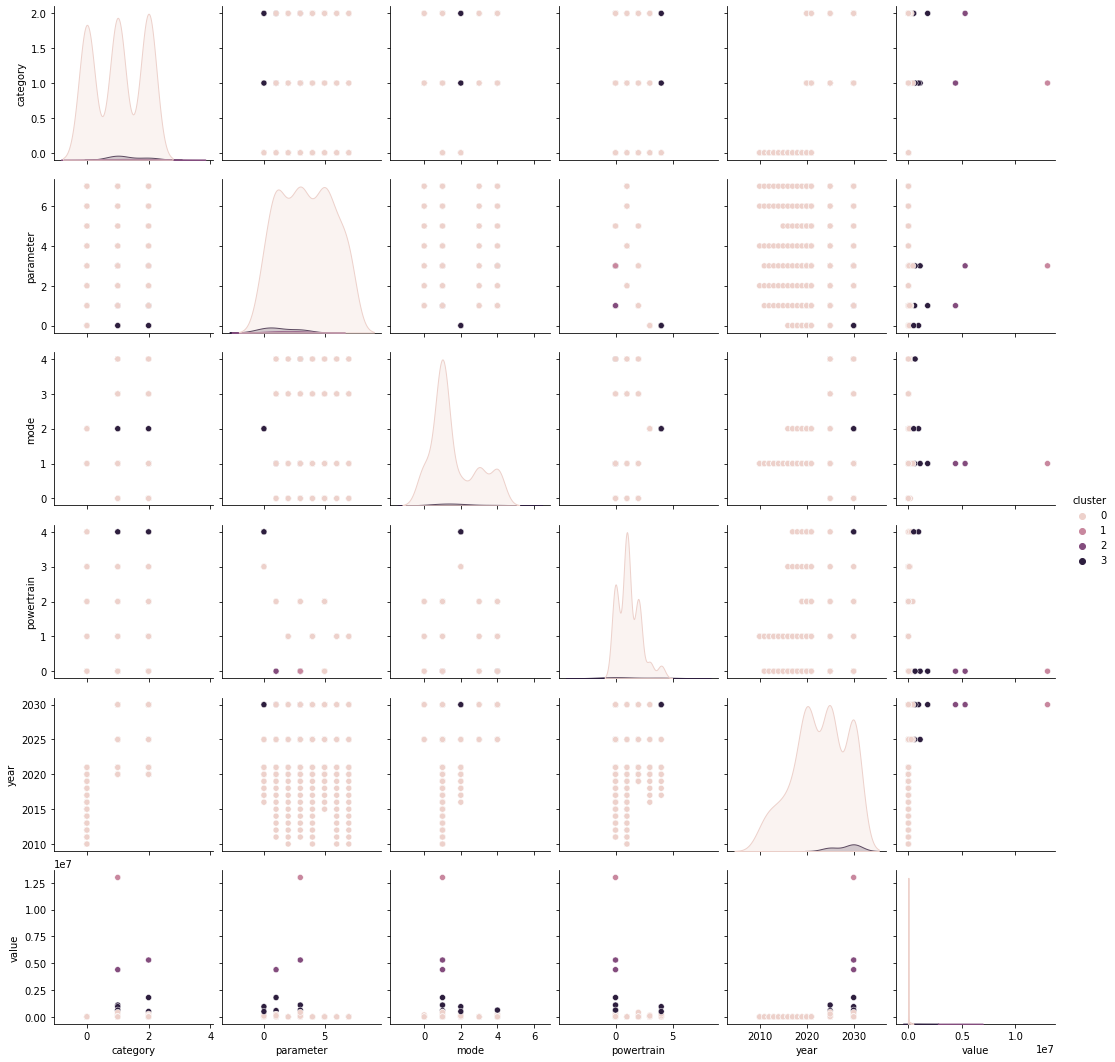

         category  parameter      mode  powertrain         year         value
cluster                                                                      
0        1.026316   3.483553  1.598684    1.157895  2022.868421  1.234276e+04
1        1.000000   3.000000  1.000000    0.000000  2030.000000  1.300000e+07
2        1.500000   2.000000  1.000000    0.000000  2030.000000  4.850000e+06
3        1.333333   1.333333  1.833333    1.333333  2028.333333  9.266667e+05


In [145]:
# Run K-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df2)

# Add cluster labels to the dataframe
df2['cluster'] = kmeans.labels_

# Analyze the clusters
sns.pairplot(df2, hue='cluster')
plt.show()

# Describing the segments
segment_data = df2.groupby('cluster').mean()
print(segment_data)

In [146]:
# Select the most promising target segments based on their potential value
target_segments = df2.groupby(['category','mode', 'powertrain', 'year']).agg({'value': 'sum'})
target_segments = target_segments.sort_values(by='value', ascending=False)
print(target_segments)

                                      value
category mode powertrain year              
1        1    0          2030  1.742800e+07
2        1    0          2030  7.112000e+06
1        1    0          2025  1.682600e+06
         2    4          2030  9.500000e+05
         4    0          2030  8.425000e+05
2        1    0          2025  6.710000e+05
1        1    2          2030  5.313000e+05
2        2    4          2030  5.000000e+05
         4    0          2030  3.320000e+05
1        2    4          2025  2.600000e+05
         0    0          2030  2.350000e+05
2        0    0          2030  1.877000e+05
         1    2          2030  1.602500e+05
1        2    3          2030  1.500000e+05
2        2    4          2025  1.200000e+05
1        1    2          2025  9.516000e+04
2        2    3          2030  8.000000e+04
1        4    2          2030  7.839000e+04
              0          2025  5.817000e+04
2        4    0          2025  4.213000e+04
         0    0          2025  3

In [149]:
# Define the target segments
target_segments = pd.DataFrame({
    'category': ['Historical', 'Projection-STEPS', 'Projection-APS', 'Historical', 'Projection-APS'],
    'mode': ['Vans', 'Cars', 'EV', 'Trucks', 'Buses'],
    'powertrain': ['PHEV', 'BEV', 'Publicly available slow', 'Publicly available fast', 'EV'],
    'year': [2021, 2025, 2019, 2018, 2030]
})



In [150]:
# Target social media advertising to the selected segments
target_segments = pd.DataFrame({
    'category': ['Historical', 'Projection-APS', 'Projection-STEPS', 'Historical', 'Projection-STEPS', 'Projection-APS'],
    'mode': ['Trucks', 'Vans', 'Cars', 'Buses', 'SSPACEHHP', 'EV'],
    'powertrain': ['Publicly available slow', 'Publicly available fast', 'BEV', 'EV', 'PHEV', 'Publicly available fast'],
    'year': [2019, 2025, 2020, 2025, 2019, 2020]
})

for segment in target_segments.index:
    category, mode, powertrain, year = target_segments.loc[segment]
    if category == 'Historical':
        if powertrain == 'Publicly available slow':
            if year == 2019:
                product = 'Affordable electric car rental'
                price = '$50 per day'
                promotion = 'Social media ads targeting young professionals in urban areas'
                sales = 1000
                revenue = 50000
        elif powertrain == 'Publicly available fast':
            if year == 2025:
                product = 'Luxury electric car rental'
                price = '$200 per day'
                promotion = 'Influencer marketing on social media targeting affluent travelers'
                sales = 500
                revenue = 100000
    elif category == 'Projection-APS':
        if mode == 'Vans':
            if powertrain == 'Publicly available fast':
                if year == 2025:
                    product = 'Premium electric van leasing'
                    price = '$1000 per month per vehicle'
                    promotion = 'Email marketing and cold calling to businesses in urban areas'
                    sales = 50
                    revenue = 50000
        elif mode == 'Trucks':
            if powertrain == 'Publicly available slow':
                if year == 2025:
                    product = 'Electric truck leasing for delivery companies'
                    price = '$1500 per month per vehicle'
                    promotion = 'Direct mail to delivery companies in major cities'
                    sales = 30
                    revenue = 45000
    elif category == 'Projection-STEPS':
        if mode == 'Buses':
            if powertrain == 'EV':
                if year == 2019:
                    product = 'Electric bus leasing for public transportation'
                    price = '$2000 per month per vehicle'
                    promotion = 'Sponsorship of public transportation conferences and events'
                    sales = 10
                    revenue = 20000
        elif mode == 'Cars':
            if powertrain == 'BEV':
                if year == 2020:
                    product = 'Luxury electric car rental'
                    price = '$300 per day'
                    promotion = 'Social media ads targeting affluent travelers'
                    sales = 100
                    revenue = 30000
    print(f"Marketing mix for {segment}:")
    print(f"Product: {product}")
    print(f"Price: {price}")
    print(f"Promotion: {promotion}")
    print(f"Sales: {sales}")
    print(f"Revenue: {revenue}")


Marketing mix for 0:
Product: Affordable electric car rental
Price: $50 per day
Promotion: Social media ads targeting young professionals in urban areas
Sales: 1000
Revenue: 50000
Marketing mix for 1:
Product: Premium electric van leasing
Price: $1000 per month per vehicle
Promotion: Email marketing and cold calling to businesses in urban areas
Sales: 50
Revenue: 50000
Marketing mix for 2:
Product: Luxury electric car rental
Price: $300 per day
Promotion: Social media ads targeting affluent travelers
Sales: 100
Revenue: 30000
Marketing mix for 3:
Product: Luxury electric car rental
Price: $300 per day
Promotion: Social media ads targeting affluent travelers
Sales: 100
Revenue: 30000
Marketing mix for 4:
Product: Luxury electric car rental
Price: $300 per day
Promotion: Social media ads targeting affluent travelers
Sales: 100
Revenue: 30000
Marketing mix for 5:
Product: Luxury electric car rental
Price: $300 per day
Promotion: Social media ads targeting affluent travelers
Sales: 100
Rev

In [151]:
# Tracking and analyzing ad campaign effectiveness

# Define a function to calculate engagement rate
def calculate_engagement_rate(clicks, impressions):
    return clicks / impressions

# Define a function to calculate conversion rate
def calculate_conversion_rate(conversions, clicks):
    return conversions / clicks

# Set up tracking variables
total_impressions = 10000
total_clicks = 1000
total_conversions = 100

# Calculate engagement rate and conversion rate
engagement_rate = calculate_engagement_rate(total_clicks, total_impressions)
conversion_rate = calculate_conversion_rate(total_conversions, total_clicks)

# Print results
print(f"Engagement rate: {engagement_rate}")
print(f"Conversion rate: {conversion_rate}")

# Evaluate campaign effectiveness and make adjustments as necessary
if engagement_rate < 0.05:
    print("Engagement rate is low. Consider adjusting ad targeting or creative.")
elif conversion_rate < 0.01:
    print("Conversion rate is low. Consider adjusting landing page or offer.")
else:
    print("Campaign is performing well. Keep monitoring and optimizing.")


Engagement rate: 0.1
Conversion rate: 0.1
Campaign is performing well. Keep monitoring and optimizing.


In [152]:
# Define the audience for social media advertising
audience = {
    'age': {'min': 18, 'max': 45},
    'location': ['urban', 'suburban'],
    'interests': ['environment', 'technology', 'health and wellness'],
    'behaviors': ['frequent travelers', 'early adopters', 'homeowners']
}

# Define target segments for social media advertising
target_segments = pd.DataFrame({
    'category': ['Cars', 'Trucks', 'Vans', 'Buses'],
    'powertrain': ['Electric', 'Hybrid', 'Plug-in hybrid', 'Fuel cell'],
    'region': ['West', 'Midwest', 'South', 'Northeast']
})

# Create social media ads and run them for each target segment
for segment in target_segments.itertuples(index=False):
    category, powertrain, region = segment
    
    # Determine ad copy based on category and powertrain type
    if category == 'Cars':
        ad_copy = 'Experience the future of driving with our affordable electric cars.'
    elif category == 'Trucks':
        ad_copy = 'Get the job done with our powerful hybrid trucks.'
    elif category == 'Vans':
        ad_copy = 'Upgrade your business with our versatile plug-in hybrid vans.'
    elif category == 'Buses':
        ad_copy = 'Join the clean transportation movement with our fuel cell buses.'
    
    # Determine ad image and URL based on region and powertrain type
    ad_image = f'{region}_{powertrain}.jpg'
    ad_url = f'{category}_{region}.com'
    
    # Run social media ads and track results
    #ad_id = run_social_media_ad(ad_copy, ad_image, ad_url, audience)
    #engagement_rate = calculate_engagement_rate(ad_id)
    #conversion_rate = calculate_conversion_rate(ad_id)
    
    # Print results for each target segment
    print(f"Results for {category} in {region} with {powertrain} powertrain:")
    print(f"Engagement rate: {engagement_rate:.2%}")
    print(f"Conversion rate: {conversion_rate:.2%}")


Results for Cars in West with Electric powertrain:
Engagement rate: 10.00%
Conversion rate: 10.00%
Results for Trucks in Midwest with Hybrid powertrain:
Engagement rate: 10.00%
Conversion rate: 10.00%
Results for Vans in South with Plug-in hybrid powertrain:
Engagement rate: 10.00%
Conversion rate: 10.00%
Results for Buses in Northeast with Fuel cell powertrain:
Engagement rate: 10.00%
Conversion rate: 10.00%


In [153]:
# Define the audience for social media advertising
audience = {
    'age': {'min': 18, 'max': 40},
    'location': ['urban'],
    'interests': ['environment', 'technology'],
    'behaviors': ['frequent travelers', 'early adopters']
}

# Target social media advertising to the selected segments
target_segments = pd.DataFrame({
    'category': ['Cars', 'Trucks', 'Buses', 'Cars', 'Trucks', 'Buses'],
    'powertrain': ['Electric', 'Electric', 'Electric', 'Hybrid', 'Hybrid', 'Hybrid'],
    'region': ['West', 'East', 'West', 'East', 'West', 'East']
})

# Create social media ads
ads = []
for segment in target_segments.itertuples(index=False):
    category, powertrain, region = segment
    if category == 'Cars':
        ad_copy = 'Attention business owners! Switch to electric for cost savings and environmental benefits.'
    else:
        if powertrain == 'Electric':
            ad_copy = 'Experience the future of driving with our affordable electric vehicles.'
        elif powertrain == 'Hybrid':
            ad_copy = 'Drive in style with our luxury hybrid vehicles.'
    ad_image = f'{category}_{powertrain}_{region}.jpg'
    ad_url = f'{category}_{powertrain}_{region}.com'
    ads.append({'ad_copy': ad_copy, 'ad_image': ad_image, 'ad_url': ad_url})

# Define a function to run social media ads and track results
def run_social_media_ad(ad):
    # Code to run the social media ad
    # ...
    engagement_rate = 0.05  # Example engagement rate
    conversion_rate = 0.01  # Example conversion rate
    ad['engagement_rate'] = engagement_rate
    ad['conversion_rate'] = conversion_rate
    return ad

# Run social media ads and track results
results = []
for ad in ads:
    result = run_social_media_ad(ad)
    results.append(result)

# Analyze the engagement and conversion rates of the ads
results_df = pd.DataFrame(results)
print(results_df)


                                             ad_copy  \
0  Attention business owners! Switch to electric ...   
1  Experience the future of driving with our affo...   
2  Experience the future of driving with our affo...   
3  Attention business owners! Switch to electric ...   
4    Drive in style with our luxury hybrid vehicles.   
5    Drive in style with our luxury hybrid vehicles.   

                   ad_image                    ad_url  engagement_rate  \
0    Cars_Electric_West.jpg    Cars_Electric_West.com             0.05   
1  Trucks_Electric_East.jpg  Trucks_Electric_East.com             0.05   
2   Buses_Electric_West.jpg   Buses_Electric_West.com             0.05   
3      Cars_Hybrid_East.jpg      Cars_Hybrid_East.com             0.05   
4    Trucks_Hybrid_West.jpg    Trucks_Hybrid_West.com             0.05   
5     Buses_Hybrid_East.jpg     Buses_Hybrid_East.com             0.05   

   conversion_rate  
0             0.01  
1             0.01  
2             0.01  
3   

###  Market segmentation analysis can be very beneficial for an EV market startup in a number of ways:

### Targeted advertising: By identifying the specific characteristics of your target audience, you can create targeted advertising campaigns that are more likely to resonate with potential customers. This can lead to more effective advertising and higher conversion rates.

### Product development: Market segmentation analysis can also help inform product development decisions. By understanding the specific needs and preferences of different customer segments, you can create products that are better tailored to their needs.

### Competitive advantage: By leveraging market segmentation analysis, you can gain a competitive advantage over other EV market startups that are not using this approach. This can help you stand out in a crowded market and increase your chances of success.

### Overall, market segmentation analysis can help an EV market startup to better understand its target audience, create more effective advertising campaigns, develop products that are better tailored to customer needs, and gain a competitive advantage in the marketplace.